# Polarized CMB foregrounds and Galactic magnetic fields

The purpose of this notebook is to relate the polarized CMB foregrounds to the Galactic magnetic fields with simulated examples.  The microwave bands are dominated by synchrotron emission at the lower frequencies and thermal dust emission at the higher frequencies.  Both are strongly polarized according to the magnetic field in the emission region.  The astrophysical simulator hammurabi was designed precisely to simulate polarized emission based on models of the magnetized interstellar medium.  See https://sourceforge.net/projects/hammurabicode/ for details of the code and the python interface used here.

Set up the libraries we'll need:

In [1]:
%matplotlib inline
import hampy
import healpy as hp
import numpy as np
from view_patch import view_patch
from view_field import view_field
import matplotlib
from pylab import cm
cmap=cm.get_cmap('jet')
cmap.set_under('w')

# Polarized synchrotron emission

First, let's look at the observations of synchrotron emission.  The best full-sky map of its total intensity is the Halsam map at 408MHz (see https://lambda.gsfc.nasa.gov/product/foreground/2014_haslam_408_info.cfm).  In polarization, a good dataset is the WMAP K-band data from Page et al. (2007) (see https://lambda.gsfc.nasa.gov/product/map/dr5/skymap_info.cfm).  

In [2]:
haslam=hp.read_map('foregrounds/haslam408_dsds_Remazeilles2014.fits',verbose=0)
wmapK=hp.read_map('foregrounds/wmap_band_smth_iqumap_r9_9yr_K_v5.fits',field=(0,1,2),verbose=0)

/Users/Shared/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/healpy/fitsfunc.py:335: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  "assume {}".format(schm))


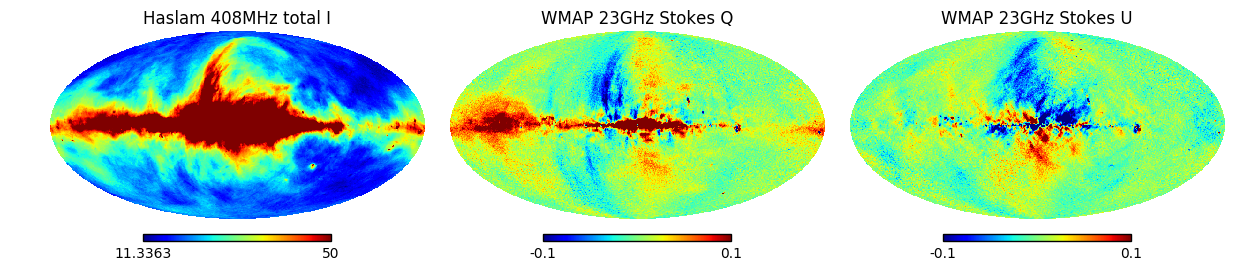

In [4]:
matplotlib.rcParams['figure.figsize'] = (12.0, 3.0)
hp.mollview(haslam,title='Haslam 408MHz total I',sub=(1,3,1),cmap=cmap,max=50)
hp.mollview(wmapK[1],title='WMAP 23GHz Stokes Q',sub=(1,3,2),cmap=cmap,min=-0.1,max=0.1)
hp.mollview(wmapK[2],title='WMAP 23GHz Stokes U',sub=(1,3,3),cmap=cmap,min=-0.1,max=0.1)


Why do we not look at synchrotron polarization in the radio?  Because Faraday rotation becomes significant at longer wavelengths, and the effect of the Faraday rotation from the turbulent interstellar medium is to depolarize all emission that is not very nearby (a very few kpc).  For example, at 1.4GHz as shown below at left, the sky shows the depolarization band for |b|<30$^\circ$ except near the "Fan" region in the second quadrant.  

Alternatively, why do we not look at the WMAP total intensity for synchrotron?  Because in the microwave bands, the free-free emission (traced by H$\alpha$, below middle) dominates the synchrotron emission near the plane, where you can see the free-free structures such as the Gum Nebula and Orion complex in the K-band map (below right).  The microwave bands also have an anomalous microwave emission (aka "spinning dust") contribution as well for which we do not yet have any othertracer.  The component separation problem, even with the additional frequencies from Planck, cannot yet be solved in the plane (see, e.g., https://arxiv.org/abs/1502.01588).  


** Permission needed to show DRAO+VillaElisa?  I made the map myself from the individual datasets on the Bonn survey site. **

In [5]:
dv_q=hp.read_map('foregrounds/DRAO_VillaElisa_21cm_Q_all_healpix.fits',verbose=0)
dv_u=hp.read_map('foregrounds/DRAO_VillaElisa_21cm_U_all_healpix.fits',verbose=0)
halpha=hp.read_map('foregrounds/lambda_halpha_fwhm06_0512_ring.fits',verbose=0)

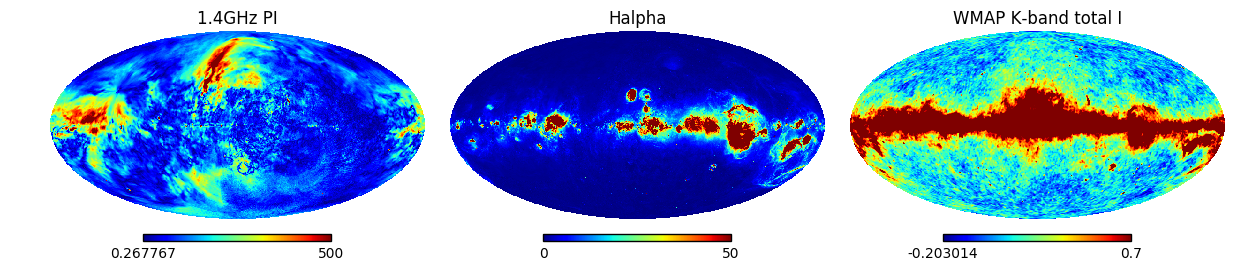

In [6]:
matplotlib.rcParams['figure.figsize'] = (12.0, 3.0)
hp.mollview(np.sqrt(dv_q**2 + dv_u**2),title='1.4GHz PI',cmap=cmap,max=500,sub=(1,3,1))
hp.mollview(halpha,title='Halpha',cmap=cmap,sub=(1,3,2),max=50,min=0)
hp.mollview(wmapK[0],title='WMAP K-band total I',cmap=cmap,max=0.7,sub=(1,3,3))


The point of the above is to show how difficult it is to answer the seemingly simple question of how polarized the synchrotron emission is in the plane of the Galaxy.  

# Polarized dust emission
Below, we show the dust emission in total and polarized intensities from the Planck 353GHz measurements. At that frequency, the dominant emission component is dust and there is no Faraday rotation, so the 353GHz maps themselves give us directly the degree of polarization of the dust emission averaged along each LOS.  

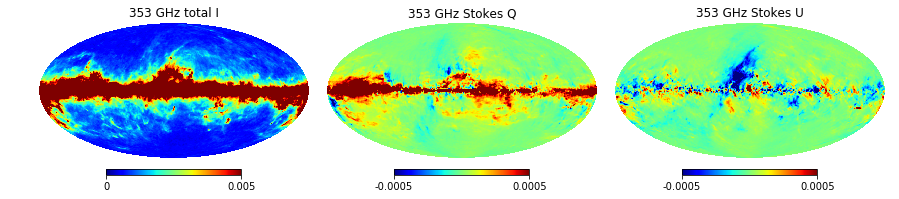

In [10]:
planck353=hp.read_map('foregrounds/HFI_SkyMap_353-field-IQU_0256_R2.02_full_1deg.fits',field=(0,1,2),verbose=0)
matplotlib.rcParams['figure.figsize'] = (12.0, 3.0)
hp.mollview(planck353[0],title='353 GHz total I',cmap=cmap,sub=(1,3,1),min=0,max=0.005)
hp.mollview(planck353[1],title='353 GHz Stokes Q',cmap=cmap,sub=(1,3,2),min=-5e-4,max=5e-4)
hp.mollview(planck353[2],title='353 GHz Stokes U',cmap=cmap,sub=(1,3,3),min=-5e-4,max=5e-4)

It is interesting to compare the polarization of synchrotron and dust (see https://arxiv.org/pdf/1405.0871.pdf).  For example, the strongly polarized Fan region (low latitudes in the second quadrant) shows up in both tracers.  But aside from the Galactic plane being more strongly polarized, the two observables do not appear to trace the same regions.  This is not surprising.  The synchrotron emission is generated by cosmic ray leptons whose distribution continues out several kpc from the midplane, while dust grains are confined to the thin and cold disk of the Galaxy.  So any dust emission feature not on the plane is very nearby, and we would not necessarily expect to see a corresponding feature in the synchrotron emission.  (The origin of the Fan is an intriguing mystery.  It has not been satisfactorily explained as either a local emission region or a feature of the large-scale Galactic magnetic field.  See e.g. https://arxiv.org/abs/1702.02200.)

# Simulations
Hammurabi is a 3D Galaxy simulator designed to produce simulated observables related to the magnetized interstellar medium in the Milky Way.  In particular, it uses a 3D HEALPix-based grid to produce full-sky maps of synchrotron and dust emission in Stokes I, Q, and U parameters as well as Faraday rotation measures (RM).  The simulations include depolarization effects due to depth and beam depolarization, including simulating the Faraday effects along each line of sight.  

First we'll look at the **coherent component** alone, with no small-scale random field component:


By default, hammurabi uses its simplest model, the axi-symmetric spiral model derived from WMAP data in **Page et al.** (2007, https://arxiv.org/abs/astro-ph/0603450):

In [13]:
hamPage=hampy.Hampy(
    working_directory='./test_Page.out',
        custom_parameters={
            "do_dust":"T",
            "B_field_total_out":"test_Page.out/Page_bfield.bin"
        }
)
hamPage.call()

....

0

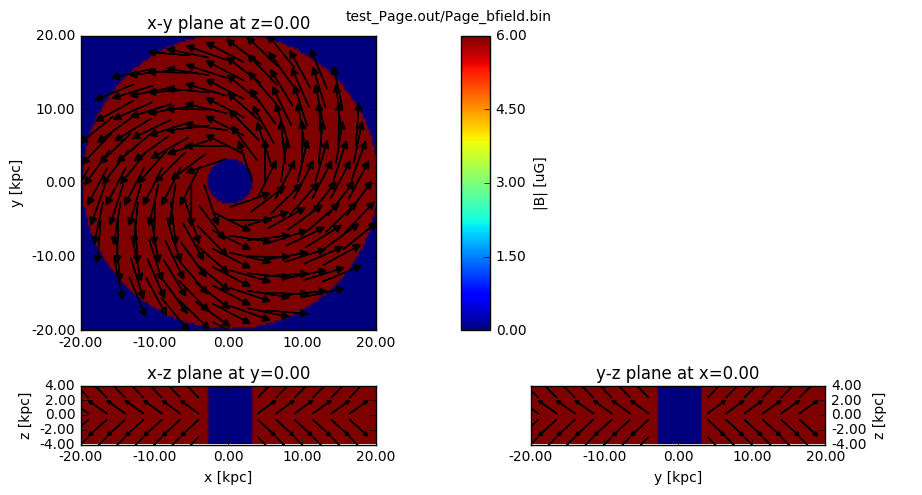

In [46]:
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
view_field(
    infile="test_Page.out/Page_bfield.bin",
    Ndims=[128,128,26],
    bscale=0.06,
    bskip=8
)

The model of **Sun et al.** (2008, 2010, https://arxiv.org/abs/1010.4394) has a similar axi-symmetric spiral but with several reversals to match not only the synchrotron data but also the Faraday rotation measure (RM) data (which unlike polarized synchrotron or dust emission is sensitive not only to the field orientation but to its direction):

In [22]:
hamSun=hampy.Hampy(
    custom_parameters={
        'B_field_type':3,
        "do_dust":"T",
        "B_field_total_out":"test_Sun.out/Sun_bfield.bin"
    },
    working_directory='./test_Sun.out')
hamSun.call()

....

0

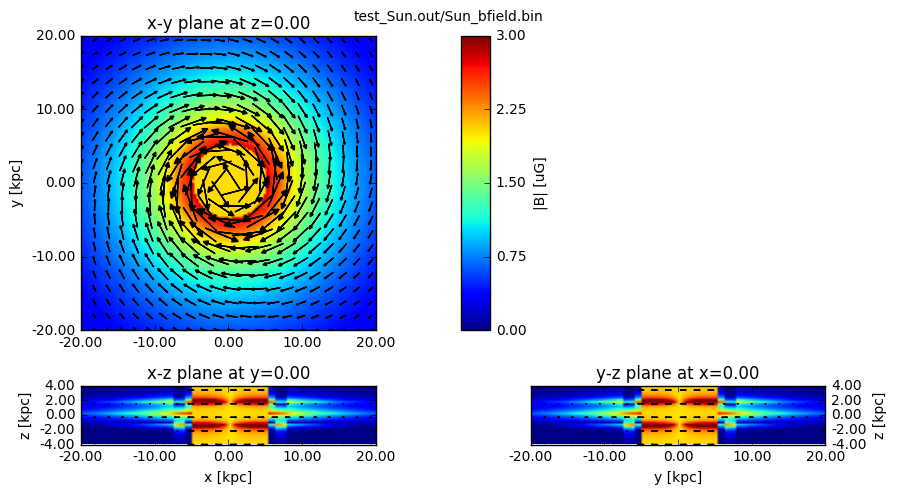

In [42]:
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
view_field(
    infile="test_Sun.out/Sun_bfield.bin",
    Ndims=[128,128,26], 
    crange=[0,3],
    bscale=0.06,
    bskip=6 
)

The model of **Jaffe et al.** (2010, 2011, 2013) revised in Planck PIP XLII (2016, https://arxiv.org/abs/1601.00546) has four spiral arms and was fitted to both synchrotron emission and RMs:

In [30]:
hamJaffe=hampy.Hampy(
        custom_parameters='test/jaffe13b.txt',
        working_directory='./test_Jaffe.out')
hamJaffe.call(custom_parameters={
            "do_dust":"T",
            "B_field_total_out":"test_Jaffe.out/Jaffe_bfield.bin"})

......

0

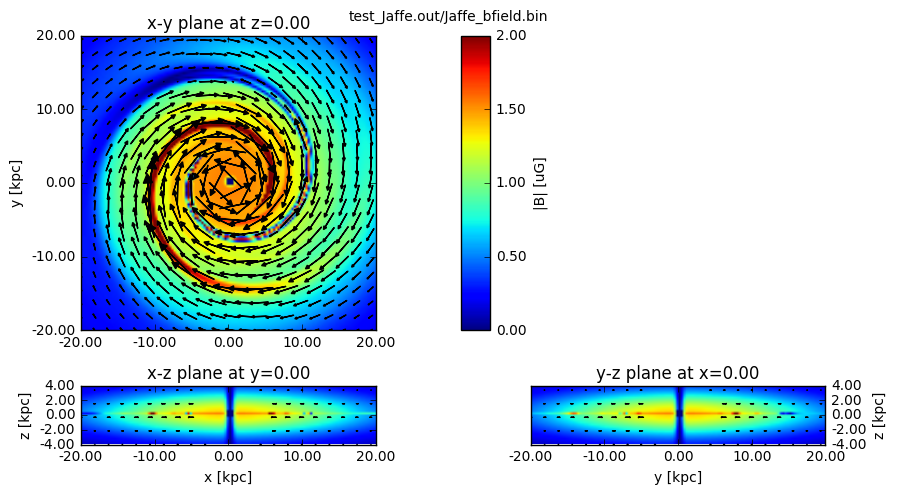

In [43]:
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
view_field(
    infile="test_Jaffe.out/Jaffe_bfield.bin",
    Ndims=[128,128,26],  # The dimensions, as given to hammurabi above
    crange=[0,2],
    bscale=0.1,         # The maximum length of the arrow in units of the plot size
    bskip=6             # How many bins to skip between arrows.
)

The **Jansson & Farrar** (2012a,2012b, https://arxiv.org/abs/1210.7820) uses spiral arm segments as well as both field and 'halo' (i.e., thick disk) components that include a vertical field component to reproduce the x-shaped polarization morphology visible in other galaxies (see, e.g., https://link.springer.com/article/10.1007/s00159-015-0084-4#Sec24):

In [39]:
hamJansson=hampy.Hampy(custom_parameters={
            'B_field_type':7,
            "do_dust":"T",
            "B_field_total_out":"test_Jansson.out/Jansson_bfield.bin"
        },working_directory='./test_Jansson.out')
hamJansson.call()

....

0

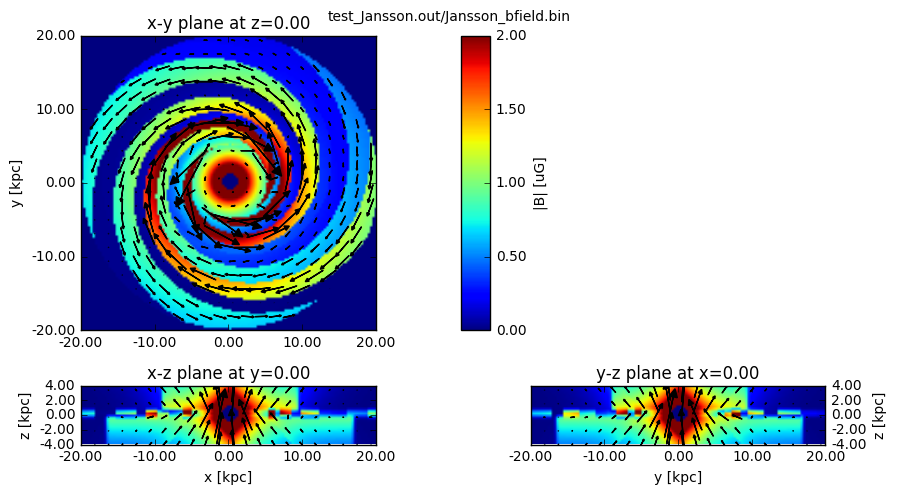

In [44]:
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
view_field(
    infile="test_Jansson.out/Jansson_bfield.bin",
    Ndims=[128,128,26],
    crange=[0,2],
    bscale=0.1,
    bskip=6
)

The above plots show the different morphologies of the coherent component of the magnetic field.  Now let's look at the expected polarized emission from each.  

We have generated these results using a common model for the cosmic ray distribution rather than the four different versions used in the original papers on these models.  (This makes the normalization change, but for the moment we are interested only in morphology and simply normalize them all to an arbitrary common scale.) 

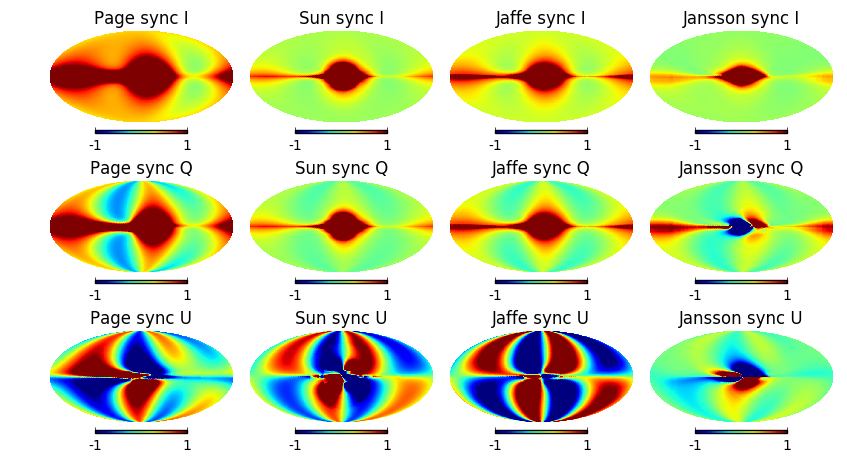

In [59]:
#  Normalize all to RMS=1 just to compare morphology depsite differences in CREs assumed in the fitting of each model.
mapsPage=hamPage.get_observables(rms=1)
mapsSun=hamSun.get_observables(rms=1)
mapsJaffe=hamJaffe.get_observables(rms=1)
mapsJansson=hamJansson.get_observables(rms=1)

matplotlib.rcParams['figure.figsize'] = (8.0, 4.5)
hp.mollview(mapsPage['Is'],min=-1,max=1,title='Page sync I',sub=(3,4,1),cmap=cmap)
hp.mollview(mapsSun['Is'],min=-1,max=1,title='Sun sync I',sub=(3,4,2),cmap=cmap)
hp.mollview(mapsJaffe['Is'],min=-1,max=1,title='Jaffe sync I',sub=(3,4,3),cmap=cmap)
hp.mollview(mapsJansson['Is'],min=-1,max=1,title='Jansson sync I',sub=(3,4,4),cmap=cmap)

hp.mollview(mapsPage['Qs'],min=-1,max=1,title='Page sync Q',sub=(3,4,5),cmap=cmap)
hp.mollview(mapsSun['Qs'],min=-1,max=1,title='Sun sync Q',sub=(3,4,6),cmap=cmap)
hp.mollview(mapsJaffe['Qs'],min=-1,max=1,title='Jaffe sync Q',sub=(3,4,7),cmap=cmap)
hp.mollview(mapsJansson['Qs'],min=-1,max=1,title='Jansson sync Q',sub=(3,4,8),cmap=cmap)

hp.mollview(mapsPage['Us'],min=-1,max=1,title='Page sync U',sub=(3,4,9),cmap=cmap)
hp.mollview(mapsSun['Us'],min=-1,max=1,title='Sun sync U',sub=(3,4,10),cmap=cmap)
hp.mollview(mapsJaffe['Us'],min=-1,max=1,title='Jaffe sync U',sub=(3,4,11),cmap=cmap)
hp.mollview(mapsJansson['Us'],min=-1,max=1,title='Jansson sync U',sub=(3,4,12),cmap=cmap)


And now the dust for comparison.  
(Not plotting the dust total I, which in this model is a trivial exponential disk that is identical for all models.)

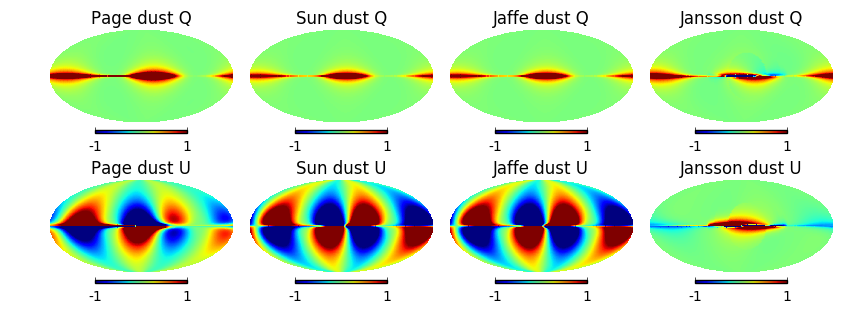

In [52]:
matplotlib.rcParams['figure.figsize'] = (8.0, 3.0)
hp.mollview(mapsPage['Qd'],min=-1,max=1,title='Page dust Q',sub=(2,4,1),cmap=cmap)
hp.mollview(mapsSun['Qd'],min=-1,max=1,title='Sun dust Q',sub=(2,4,2),cmap=cmap)
hp.mollview(mapsJaffe['Qd'],min=-1,max=1,title='Jaffe dust Q',sub=(2,4,3),cmap=cmap)
hp.mollview(mapsJansson['Qd'],min=-1,max=1,title='Jansson dust Q',sub=(2,4,4),cmap=cmap)

hp.mollview(mapsPage['Ud'],min=-1,max=1,title='Page dust U',sub=(2,4,5),cmap=cmap)
hp.mollview(mapsSun['Ud'],min=-1,max=1,title='Sun dust U',sub=(2,4,6),cmap=cmap)
hp.mollview(mapsJaffe['Ud'],min=-1,max=1,title='Jaffe dust U',sub=(2,4,7),cmap=cmap)
hp.mollview(mapsJansson['Ud'],min=-1,max=1,title='Jansson dust U',sub=(2,4,8),cmap=cmap)


One interesting thing to see is how the morphology of the Stokes Q (which dominates the polarization because the field is on average mostly parallel to the Galactic plane) changes from dust to synchrotron.  This is most striking for the Jansson12 model (far right) that includes the halo component that the CRE thick disk traces but the cold dust is not sensitive to.  Note also that though it is not shown here, even if the particle distributions are identical, the synchrotron and dust morphologies do **not** come out the same.  Though both components depend on the plane-of-sky component of the magnetic field, the synchrotron depends on the magnetic field strength in a way that the dust emission does not.  This means that the emission will add differently along the LOS, weighting regions with more CREs for synchrotron but not for dust. (Though the alignment of the dust grains is likely to depend on the strength of the field, the emissivity does not;  the physics of dust polarization is more complicated than synchrotron emission and not well understood.)

# Random magnetic fields

The above models do not include the random field component.  There is plenty of evidence that the small-scale turbulent fields are at least as important as the ordered magnetic fields.  Hammurabi includes a Gaussian random field simulator, which though not an accurate representation of the turbulent ISM, is at least sufficient to explore the effects of the stochastic changing of the field direction on the observables.  

In [80]:
print hamJaffe.call(custom_parameters={
            "do_dust":"T",
            "B_field_do_random":"T",
            "B_field_RMS_uG":"6",
            "B_field_cutoff":"1",
            "B_field_seed":"3469573",
            "B_field_total_out":"test_Jaffe.out/Jaffe_bfield.bin"})


...........0


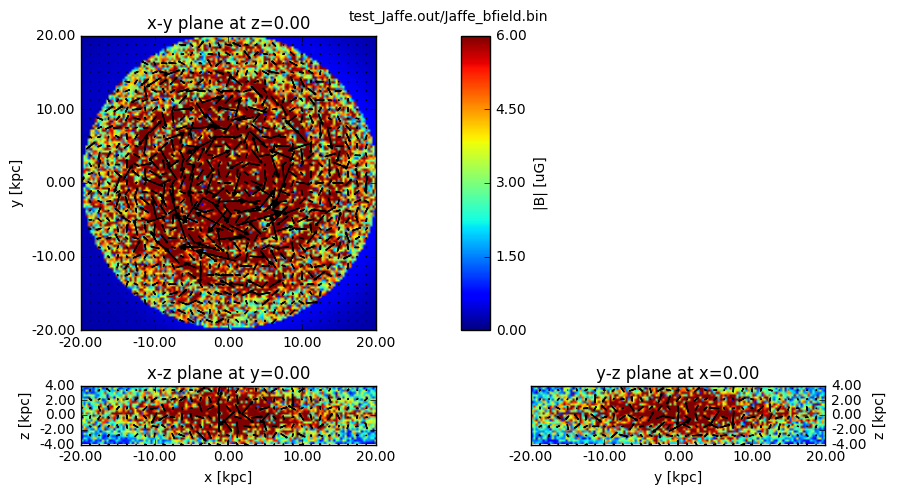

In [81]:
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
view_field(
    infile="test_Jaffe.out/Jaffe_bfield.bin",
    Ndims=[128,128,26],
    crange=[0,6],
    bscale=0.1, 
    bskip=4
)

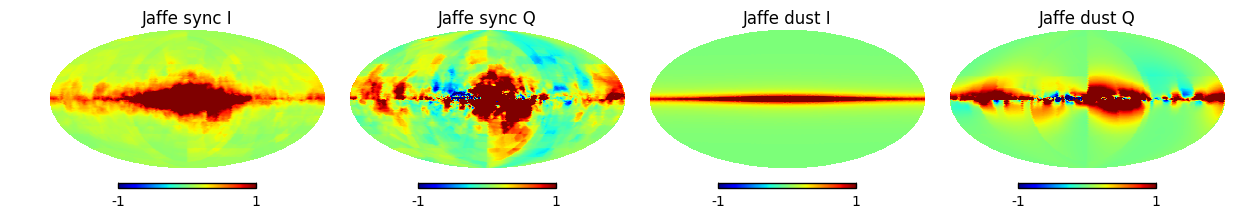

In [82]:
#  Normalize all to RMS=1 just to compare morphology depsite differences in CREs assumed in the fitting of each model.
mapsPage=hamJaffe.get_observables(rms=1)

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
hp.mollview(mapsPage['Is'],min=-1,max=1,title='Jaffe sync I',sub=(2,4,1),cmap=cmap)
hp.mollview(mapsPage['Qs'],min=-1,max=1,title='Jaffe sync Q',sub=(2,4,2),cmap=cmap)
hp.mollview(mapsPage['Id'],min=-1,max=1,title='Jaffe dust I',sub=(2,4,3),cmap=cmap)
hp.mollview(mapsPage['Qd'],min=-1,max=1,title='Jaffe dust Q',sub=(2,4,4),cmap=cmap)


This is a very low resolution simulation to run quickly, and this is why there are visible pixel boundaries in the resulting maps, especially away from the plane where the low resolution nearby pixels subtend large angles.  (The dust intensity doesn't change because it is not a function of the magnetic field, so this is only shown for comparison to the synchrotron.)  It is also clear that it does not contain the same sorts of structures that the real sky does, which is not surprising given that we have modeled the irregular field component as a Gaussian random field.  The real Galaxy's irregular component is a superposition of various structures such as supernova remnants, molecular clouds, etc.  

The purpose of such simulations is not to reproduce the details of the observed sky or to generate a model foreground that can be subracted from it.  It is instead to compare the predicted observables to the data in model-fitting analyses to study the properties of the magnetized ISM.  These models are sensitive to:
* the field morphology in the disk, i.e. how well the field follows the spiral structure of the matter;
* the degree of ordering in the field, which tells us about the turbulent processes;  
* the presence and extent of field reversals, which relates to the dynamo physics;
* the distribution of various particle populations such as relativistic leptons (i.e. cosmic rays), cold dust grains, and thermal electrons;
* the injection spectrum of cosmic ray leptons and their propagation processes in the magnetized ISM;
* the vertical field component and its implications for both dynamo theories and winds from the Galactic disk;
* the correlation between the dust structures and the magnetic field, which will be important for CMB component separation;
* ...
